In [1]:
from visual_transformer import *

In [2]:
device = torch.device('cuda:1') # the big machine

In [3]:
brain = DefaultAgentBrain().to(device)

In [4]:
from game import *

pygame 2.6.1 (SDL 2.28.4, Python 3.12.8)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [5]:
game_settings = BIG_tool_use_advanced_2_5
game_settings.gameSize = 224 # for compatibility with brain's expected size
G = discreteGame(game_settings)

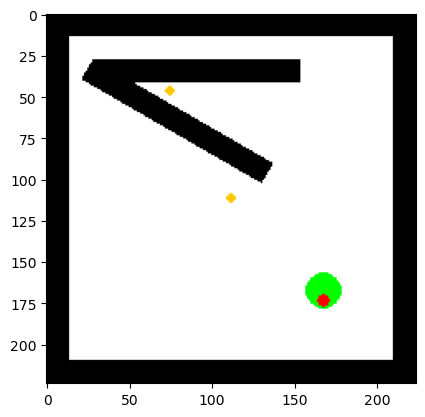

In [6]:
import matplotlib.pyplot as plt
plt.imshow(G.getData())

In [7]:
def quick_display(torch_img):
    clean = torch_img.detach().cpu()
    right_order = torch.permute(clean, (1, 2, 0))
    array = right_order.numpy()
    plt.imshow(array)

In [8]:
criterion = nn.MSELoss()

In [9]:
optimizer = optim.Adam(brain.parameters(), lr=0.001, eps=1e-9) #0.0001, betas=(0.9, 0.98), eps=1e-9)

In [10]:
import time

total_batches = 6250*32

total_loss = 0
brain.train()
for b in range(total_batches):
    if b == 0:
        start = time.time()
    img_set = G.random_full_image_set(restrict_angles=True)
    img_tensor = torch.permute(torch.FloatTensor(img_set).to(device), (0, 3, 1, 2))
    batch_size = img_tensor.size()[0]
    text_context = torch.randn((batch_size, 32, 768), device=device) # easier for pretraining to use randn
    recon = brain.img_autoencoder(img_tensor, text_context)
    loss = criterion(recon, img_tensor)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    total_loss += loss.item()
    if b == 0:
        runtime = time.time() - start
        print(f"Time for 1 batch: {runtime} seconds")
    if (b % 100 == 99):
        avg_loss = total_loss / 100
        total_loss = 0
        print(f"Avg loss for last 100 batches, at batch {b + 1}: {avg_loss}")
        torch.save(brain.img_enc.state_dict(), 'brain_checkpoints/img_encoder_weights_v2.pth')
        torch.save(brain.img_dec.state_dict(), 'brain_checkpoints/img_decoder_weights_v2.pth')

/home/atbolsh/anaconda3/envs/player/lib/python3.12/site-packages/torch/_tensor.py:955: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


Time for 1 batch: 3.695469856262207 seconds
Avg loss for last 100 batches, at batch 100: 0.2726354883611202
Avg loss for last 100 batches, at batch 200: 0.20897737935185431
Avg loss for last 100 batches, at batch 300: 0.20031342059373855
Avg loss for last 100 batches, at batch 400: 0.19961623832583428
Avg loss for last 100 batches, at batch 500: 0.19901499301195144
Avg loss for last 100 batches, at batch 600: 0.20136282667517663
Avg loss for last 100 batches, at batch 700: 0.1989170169830322
Avg loss for last 100 batches, at batch 800: 0.20027874261140824
Avg loss for last 100 batches, at batch 900: 0.19967871755361558
Avg loss for last 100 batches, at batch 1000: 0.19951286658644676
Avg loss for last 100 batches, at batch 1100: 0.19943342581391335
Avg loss for last 100 batches, at batch 1200: 0.20067144498229028
Avg loss for last 100 batches, at batch 1300: 0.1977960002422333
Avg loss for last 100 batches, at batch 1400: 0.19944738402962683
Avg loss for last 100 batches, at batch 1500

KeyboardInterrupt: 

In [ ]:
# 17 gigs for this. Nice and easy. I probably have enough left over to also run text training on the same device! 
# But there's no reason to push it.

In [ ]:
# I'll kill it after just one day and check on the results. If I like what I see, I'll keep it. Otherwise, I'll either
# let it continue or tweak some things and restart this.

In [11]:
recon[0]

tensor([[[0.7321, 0.7319, 0.7324,  ..., 0.7356, 0.7358, 0.7386],
         [0.7322, 0.7319, 0.7325,  ..., 0.7347, 0.7347, 0.7381],
         [0.7331, 0.7329, 0.7335,  ..., 0.7360, 0.7362, 0.7392],
         ...,
         [0.7326, 0.7324, 0.7329,  ..., 0.7297, 0.7296, 0.7326],
         [0.7327, 0.7325, 0.7329,  ..., 0.7295, 0.7295, 0.7325],
         [0.7352, 0.7351, 0.7354,  ..., 0.7332, 0.7331, 0.7362]],

        [[0.7593, 0.7592, 0.7597,  ..., 0.7606, 0.7609, 0.7640],
         [0.7593, 0.7591, 0.7597,  ..., 0.7601, 0.7600, 0.7632],
         [0.7602, 0.7600, 0.7606,  ..., 0.7613, 0.7617, 0.7646],
         ...,
         [0.7599, 0.7598, 0.7603,  ..., 0.7557, 0.7556, 0.7585],
         [0.7600, 0.7599, 0.7605,  ..., 0.7556, 0.7555, 0.7585],
         [0.7626, 0.7624, 0.7630,  ..., 0.7591, 0.7592, 0.7622]],

        [[0.7152, 0.7150, 0.7155,  ..., 0.7172, 0.7177, 0.7205],
         [0.7152, 0.7149, 0.7154,  ..., 0.7163, 0.7166, 0.7198],
         [0.7161, 0.7158, 0.7164,  ..., 0.7179, 0.7182, 0.

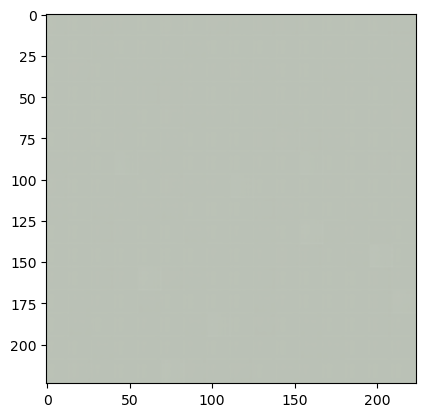

In [12]:
quick_display(recon[1])

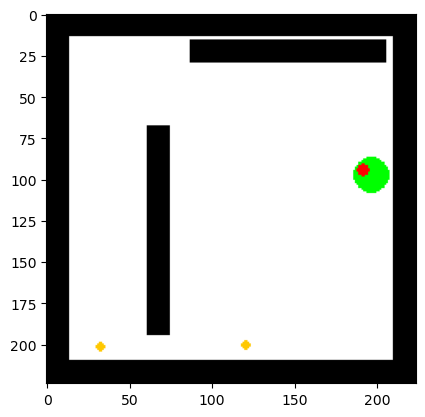

In [13]:
quick_display(img_tensor[1])

In [ ]:
 # It almost looks like it can't tell where anything is.

In [ ]:
a = torch.randn((1, 256, 768), device=device)

In [ ]:
b = brain.img_enc.embed[1](a)

In [ ]:
a

In [ ]:
b

In [ ]:
c = b - a * math.sqrt(768)
c

In [ ]:
torch.mean(c)

In [ ]:
math.sqrt(768)

In [ ]:
23200 * 40